In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = np.array(pd.read_csv("train.csv").iloc[:25000,:16].values.tolist())
trainClass = np.array(pd.read_csv("train.csv").iloc[:25000,16].values.tolist())

In [3]:
train, len(train)

(array([[ 2, 12,  1, ...,  2,  2,  2],
        [ 2,  4,  1, ...,  2,  2,  2],
        [ 2,  9,  2, ...,  2,  1,  2],
        ...,
        [ 1,  4,  2, ...,  2,  2,  2],
        [ 2, 12,  2, ...,  2,  2,  2],
        [ 2, 12,  2, ...,  2,  2,  2]]),
 25000)

In [4]:
trainClass, len(trainClass)

(array(['SOFT_COVID', 'SOFT_COVID', 'DEAD', ..., 'STRONG_COVID', 'DEAD',
        'SOFT_COVID'], dtype='<U12'),
 25000)

In [5]:
test = np.array(pd.read_csv("train.csv").iloc[25000:,:16].values.tolist())
testClass = np.array(pd.read_csv("train.csv").iloc[25000:,16].values.tolist())

In [7]:
def classe_majoritaire(label):
    valeurs, nb_fois = np.unique(label,return_counts=True)
    return valeurs[np.argmax(nb_fois)]

def classifie_kppv(k, mdesc, mclass, vx):
    dist_class = np.argsort([np.sum((coords - vx)**2) for coords in mdesc])
    return classe_majoritaire([mclass[dist_class[:k]]])

def taux_bonne_classif(predictions, realite):
    return len(predictions[predictions == realite]) / len(predictions)

In [8]:
prediction = [taux_bonne_classif(np.array([classifie_kppv(k, train[:2500], trainClass[:2500], ligne) for ligne in test[:200]]),testClass[:200]) for k in range(1,10)]

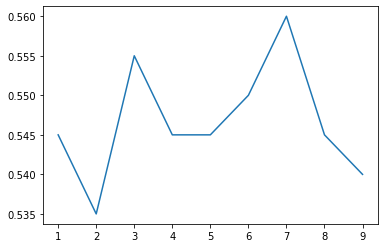

In [9]:
_ = plt.plot([i for i in range(1,10)], prediction)

In [10]:
prediction = [taux_bonne_classif(np.array([classifie_kppv(k, train[:2500], trainClass[:2500], ligne) for ligne in test[:200]]),testClass[:200]) for k in range(10,30)]

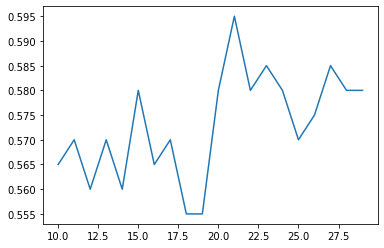

In [11]:
_ = plt.plot([i for i in range(10,30)], prediction)

In [12]:
prediction = [taux_bonne_classif(np.array([classifie_kppv(k, train[:2500], trainClass[:2500], ligne) for ligne in test[:200]]),testClass[:200]) for k in range(30,50)]

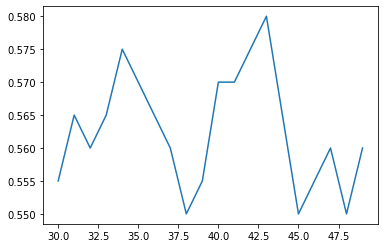

In [13]:
_ = plt.plot([i for i in range(30,50)], prediction)

In [14]:
def split_data(X, y, test_size):
    train = np.random.choice(len(X), int(len(X) * (1-test_size)), replace=False)
    X_train = np.array([X[i] for i in train])
    y_train = np.array([y[i] for i in train])
    X_test = np.array([X[i] for i in range(len(X)) if i not in train])
    y_test = np.array([y[i] for i in range(len(y)) if i not in train])
    return X_train, y_train, X_test, y_test

In [15]:
data = pd.read_csv("train.csv")
X = data[["USMER", "MEDICAL_UNIT","SEX","PNEUMONIA","AGE","DIABETES","HIPERTENSION","RENAL_CHRONIC"]]
y = data["LABEL"]
X = X.values
y = y.values
np.random.seed(42)
X_train, y_train, X_test, y_test = split_data(X, y, test_size=0.2)

In [16]:
y_pred = np.array([classifie_kppv(21, X_train, y_train, ligne) for ligne in X_test])
taux_bonne_classif(y_pred, y_test)

0.6459823656629513

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

        DEAD       0.69      0.60      0.64      2309
  SOFT_COVID       0.77      0.74      0.75      2092
STRONG_COVID       0.48      0.59      0.53      1610

    accuracy                           0.65      6011
   macro avg       0.65      0.64      0.64      6011
weighted avg       0.66      0.65      0.65      6011

